In [3]:
# importing needed libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# loading json files into dataframe
files = ["StreamingHistory_music_0.json",
         "StreamingHistory_music_1.json"]
dfs = [pd.read_json(file) for file in files]
music_df = pd.concat(dfs, ignore_index=True)
music_df.index += 1
music_df.head()

,endTime,artistName,trackName,msPlayed
1,2024-08-31 00:33,Pharrell Williams,"Double Life - From ""Despicable Me 4""",28437
2,2024-08-31 00:38,Doja Cat,Alone,228866
3,2024-08-31 00:39,Normani,Fair,1066
4,2024-08-31 00:39,Bebe Rexha,"Baby, I'm Jealous (feat. Doja Cat)",7680
5,2024-08-31 00:39,Anne-Marie,To Be Young (feat. Doja Cat),1173


In [5]:
# loading podcast file
podcast_df = pd.read_json("StreamingHistory_podcast_0.json")
podcast_df.index += 1
podcast_df.head()

,endTime,podcastName,episodeName,msPlayed
1,2024-09-15 03:43,anything goes with emma chamberlain,a talk with suki waterhouse [video],13838
2,2024-09-17 00:10,anything goes with emma chamberlain,a talk with suki waterhouse [video],20782
3,2024-09-17 00:11,anything goes with emma chamberlain,a talk with suki waterhouse [video],52509
4,2024-09-17 00:18,anything goes with emma chamberlain,a talk with suki waterhouse [video],0
5,2024-09-17 00:21,anything goes with emma chamberlain,a talk with suki waterhouse [video],808


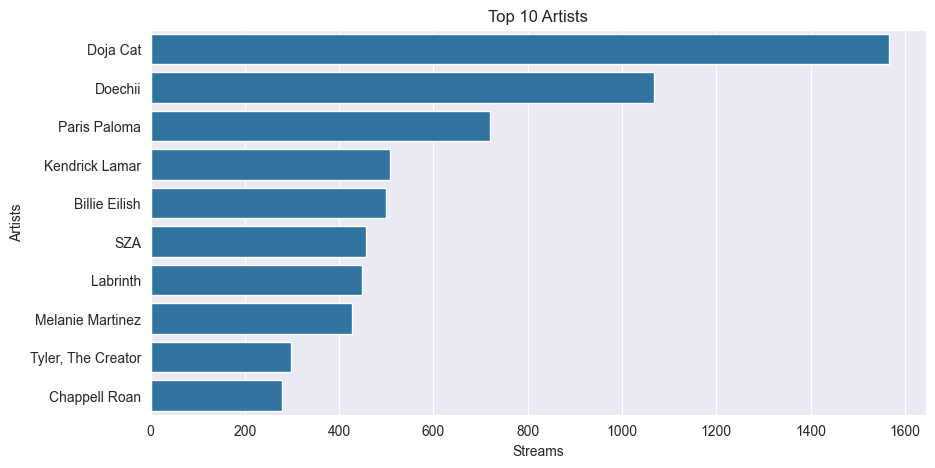

In [6]:
# getting favorite artists
fav_artists = music_df['artistName'].value_counts().head(10)
plt.figure(figsize = (10,5))
sns.barplot(x=fav_artists.values, y=fav_artists.index)
plt.title("Top 10 Artists")
plt.xlabel('Streams')
plt.ylabel("Artists")
plt.show()

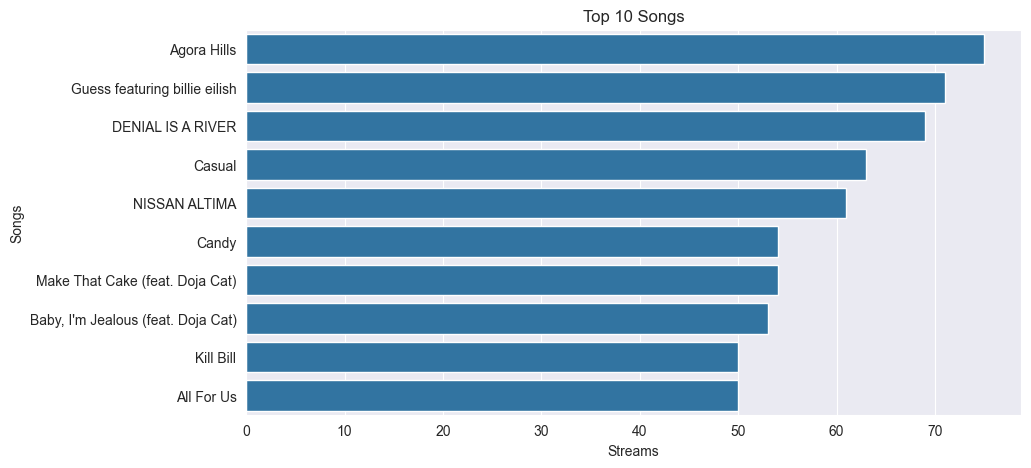

In [7]:
# getting favorite songs
fav_songs = music_df['trackName'].value_counts().head(10)
plt.figure(figsize = (10,5))
sns.barplot(x=fav_songs.values, y=fav_songs.index)
plt.title("Top 10 Songs")
plt.xlabel('Streams')
plt.ylabel("Songs")
plt.show()

In [8]:
# configuring timestamp
music_df['endTime'] = pd.to_datetime(music_df['endTime'])
music_df['date'] = music_df['endTime'].dt.date
music_df['hour'] = music_df['endTime'].dt.hour
music_df['day'] = music_df['endTime'].dt.day_name()

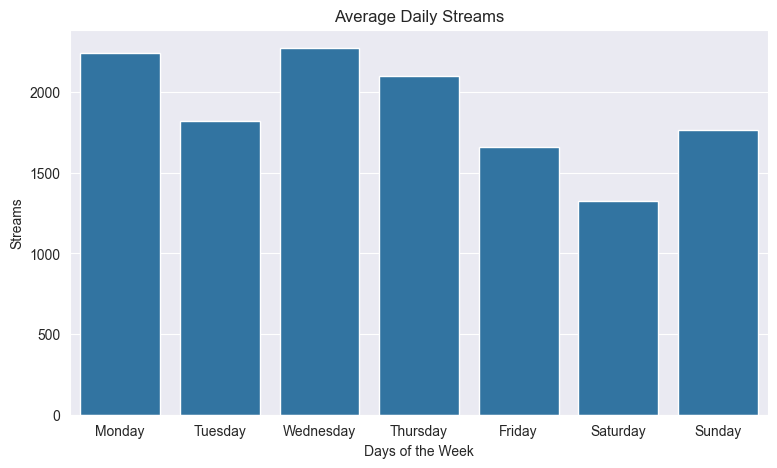

In [11]:
# daily streams
plt.figure(figsize = (9,5))
sns.countplot(x='day', data=music_df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title("Average Daily Streams")
plt.xlabel('Days of the Week')
plt.ylabel('Streams')
plt.show()

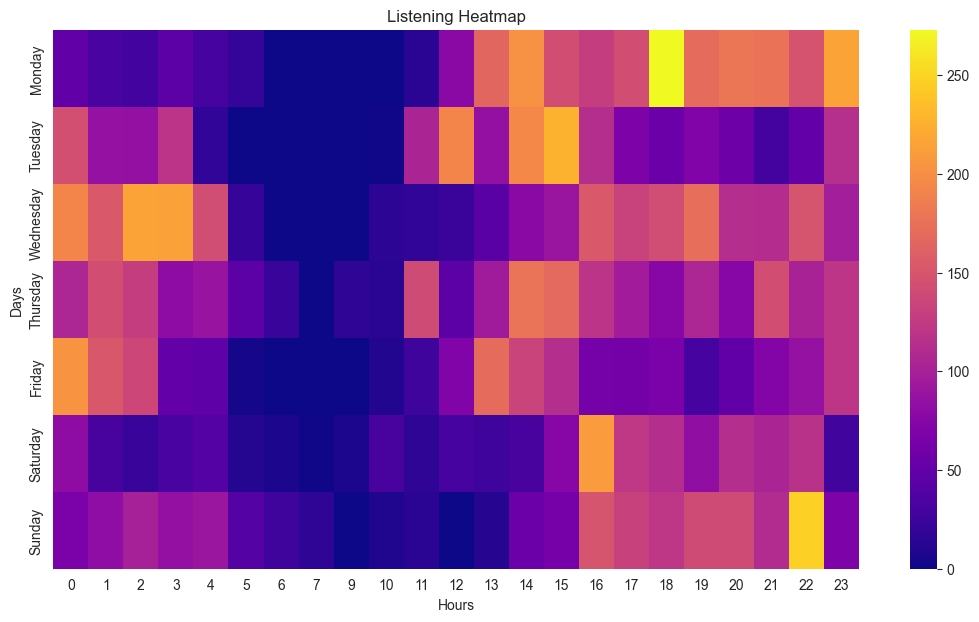

In [19]:
# most active listening hours vs days
heatmap_dt = music_df.groupby(['day', 'hour']).size().unstack(fill_value=0)
heatmap_dt = heatmap_dt.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize = (13,7))
sns.heatmap(heatmap_dt, cmap='plasma')
plt.title("Listening Heatmap")
plt.xlabel("Hours")
plt.ylabel("Days")
plt.show()

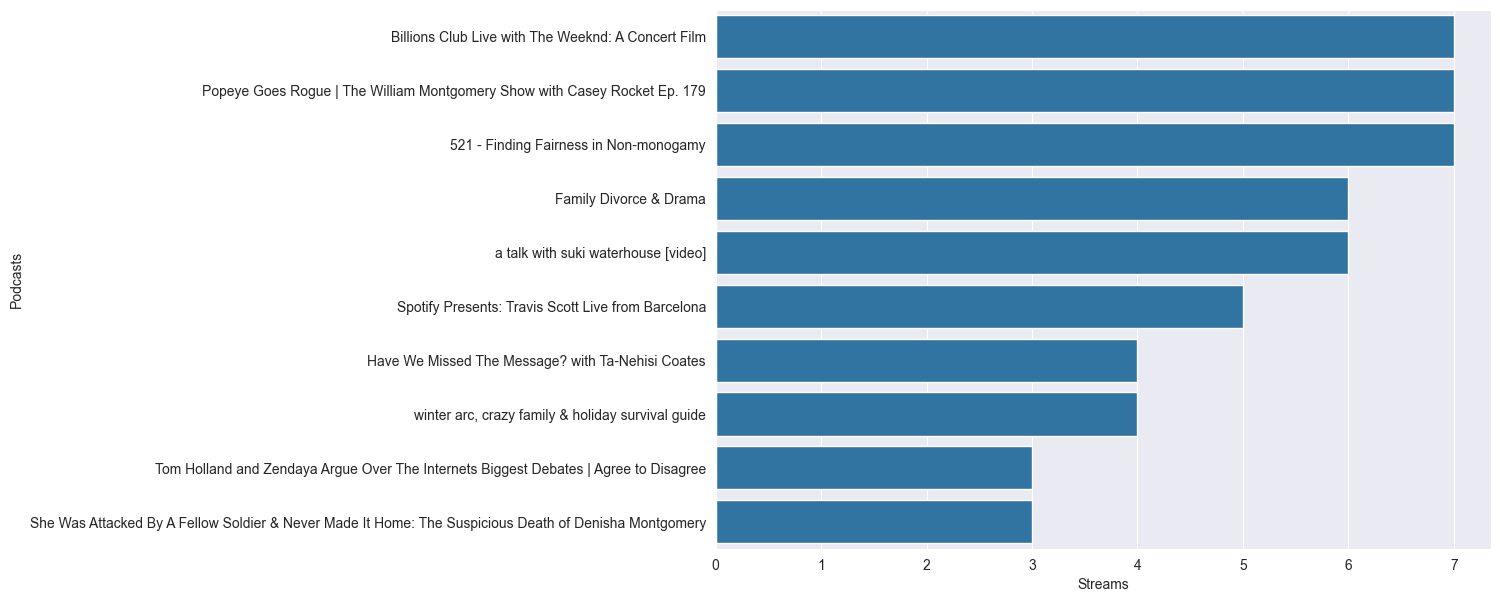

In [23]:
# visualizing favorite podcasts
fav_podcasts = podcast_df['episodeName'].value_counts().head(10)
plt.figure(figsize = (10,7))
sns.barplot(x=fav_podcasts.values, y=fav_podcasts.index)
plt.xlabel('Streams')
plt.ylabel('Podcasts')
plt.show()

In [30]:
# getting total listening time
music_df['minutes'] = music_df['msPlayed'] / 60000
music_df['hours'] = music_df['msPlayed'] / 3600000
minutes = music_df['minutes'].sum()
hours = music_df['hours'].sum()
days = hours / 24
print(f"˖ ݁♬⋆.˚𝄞. Total Listening Time: {minutes:.0f} minutes˖ ݁♬⋆.˚𝄞. ")
print(f"˖ ݁♬⋆.˚𝄞. Total Listening Time: {hours:.0f} hours˖ ݁♬⋆.˚𝄞. ")
print(f"˖ ݁♬⋆.˚𝄞. Total Listening Time: {days:.0f} days˖ ݁♬⋆.˚𝄞. ")

˖ ݁♬⋆.˚𝄞. Total Listening Time: 33178 minutes˖ ݁♬⋆.˚𝄞. 
˖ ݁♬⋆.˚𝄞. Total Listening Time: 553 hours˖ ݁♬⋆.˚𝄞. 
˖ ݁♬⋆.˚𝄞. Total Listening Time: 23 days˖ ݁♬⋆.˚𝄞. 
